In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Import các thư viện cần thiết**

In [2]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

**2. Đọc file dữ liệu GAS và chia dataset theo tỉ lệ 6:3:1**

In [41]:
# Đọc file dữ liệu
df = pd.read_csv('/content/drive/MyDrive/PTTK/VCB.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  # Use the correct format
df.set_index('Date', inplace=True)
df = df.dropna() # Drop missing values



In [42]:
# Split the data into training, testing
train_size73 = int(0.7 * len(df))
test_size73 = int(0.3 * len(df))

train_data73 = df[:train_size73]
test_data73 = df[train_size73:train_size73+test_size73]
# Split the data into training, testing
train_size82 = int(0.8 * len(df))
test_size82 = int(0.2 * len(df))

train_data82 = df[:train_size82]
test_data82 = df[train_size82:train_size82+test_size82]
# Split the data into training, testing
train_size91 = int(0.9 * len(df))
test_size91 = int(0.1 * len(df))

train_data91 = df[:train_size91]
test_data91 = df[train_size91:train_size91+test_size91]

**Xem** **lại** **dataset**

In [43]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-01-04,23277.0,23600.0,23708.0,22953.0,1.31M,0.0
2016-01-05,22899.0,23115.0,23384.0,22846.0,1.95M,0.0
2016-01-06,23169.0,22899.0,23277.0,22899.0,1.20M,0.0
2016-01-07,22899.0,23061.0,23115.0,22630.0,1.61M,0.0
2016-01-08,22738.0,22792.0,22953.0,22468.0,1.17M,0.0
...,...,...,...,...,...,...
2023-12-21,80900.0,81000.0,81000.0,80300.0,2.03M,0.0
2023-12-22,80900.0,80900.0,81100.0,80400.0,1.58M,0.0
2023-12-25,81800.0,80900.0,81800.0,80700.0,1.30M,0.0


**3. Dùng model ARIMA để train data**

In [7]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00


In [44]:
# Quá trình Training
x_train73 = np.array(train_data73.index).reshape(-1, 1)
y_train73 = np.array(train_data73['Price'])
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model73 = auto_arima(y_train73, trace=True, error_action='ignore', suppress_warnings=True, seasonal = False)
# Fit the model
model73.fit(y_train73)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23156.847, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23158.524, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23158.560, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23157.056, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=23158.699, Time=0.88 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 4.947 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [45]:
# Quá trình Training
x_train82 = np.array(train_data82.index).reshape(-1, 1)
y_train82 = np.array(train_data82['Price'])
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model82 = auto_arima(y_train82, trace=True, error_action='ignore', suppress_warnings=True, seasonal = False)
# Fit the model
model82.fit(y_train82)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=26612.163, Time=2.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26615.731, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26617.622, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26617.630, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26615.528, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=26619.926, Time=0.70 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26620.044, Time=1.01 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=26605.327, Time=2.72 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26616.370, Time=2.58 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=26606.649, Time=6.04 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.57 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=26605.110, Time=1.97 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=26616.679, Time=1.05 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=26606.381, Time=8.20 sec
 ARIMA(1,1,4)(0,0,0)[0] i

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [46]:
# Quá trình Training
x_train91 = np.array(train_data91.index).reshape(-1, 1)
y_train91 = np.array(train_data91['Price'])
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model91 = auto_arima(y_train91, trace=True, error_action='ignore', suppress_warnings=True, seasonal = False)
# Fit the model
model91.fit(y_train91)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=30153.853, Time=6.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30154.974, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30156.915, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30156.919, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=30155.231, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=30159.723, Time=1.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=30159.683, Time=1.97 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=30148.376, Time=3.56 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=30157.419, Time=1.48 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=30156.674, Time=7.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=30157.971, Time=2.01 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=30148.267, Time=3.50 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=30157.752, Time=1.18 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=30165.602, Time=4.71 sec
 ARIMA(1,1,4)(0,0,0

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

**4. Quá trình test**

In [47]:
x_test73 = np.array(test_data73.index).reshape(-1, 1)
y_test73 = np.array(test_data73['Price'])
y_pred73 = model73.predict(n_periods=len(y_test73),typ='levels', dynamic=True)

x_test82 = np.array(test_data82.index).reshape(-1, 1)
y_test82 = np.array(test_data82['Price'])
y_pred82 = model82.predict(n_periods=len(y_test82),typ='levels', dynamic=True)

x_test91 = np.array(test_data91.index).reshape(-1, 1)
y_test91 = np.array(test_data91['Price'])
y_pred91 = model91.predict(n_periods=len(y_test91),typ='levels', dynamic=True)

**6. Quá trình tạo index predict 30 ngày tiếp theo**

In [48]:
import pandas as pd
import numpy as np
from datetime import timedelta

last_date = df.index[-1]

# Generate a date range for the next 30 days
next_30_days = pd.date_range(start=last_date + timedelta(days=1), periods=30, freq='D')

# Convert the date range to an array of integers
x_next_30_days = np.arange(1, 31).reshape(-1, 1)

# Assuming 'model' is your time series model
# Predict the closing prices for the next 30 days
y_next_30_days = model73.predict(n_periods=len(x_next_30_days), typ='levels', dynamic=True)

# Create a DataFrame to store the predictions with corresponding dates
predictions_df73 = pd.DataFrame(index=next_30_days, data={'Predicted_Close': y_next_30_days})

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predictions_df73)


Predicted closing prices for the next 30 days:
            Predicted_Close
2023-12-28     76993.451289
2023-12-29     77031.902579
2023-12-30     77070.353868
2023-12-31     77108.805158
2024-01-01     77147.256447
2024-01-02     77185.707736
2024-01-03     77224.159026
2024-01-04     77262.610315
2024-01-05     77301.061605
2024-01-06     77339.512894
2024-01-07     77377.964183
2024-01-08     77416.415473
2024-01-09     77454.866762
2024-01-10     77493.318052
2024-01-11     77531.769341
2024-01-12     77570.220630
2024-01-13     77608.671920
2024-01-14     77647.123209
2024-01-15     77685.574499
2024-01-16     77724.025788
2024-01-17     77762.477077
2024-01-18     77800.928367
2024-01-19     77839.379656
2024-01-20     77877.830946
2024-01-21     77916.282235
2024-01-22     77954.733524
2024-01-23     77993.184814
2024-01-24     78031.636103
2024-01-25     78070.087393
2024-01-26     78108.538682


In [49]:
import pandas as pd
import numpy as np
from datetime import timedelta

last_date = df.index[-1]

# Generate a date range for the next 30 days
next_30_days = pd.date_range(start=last_date + timedelta(days=1), periods=30, freq='D')

# Convert the date range to an array of integers
x_next_30_days = np.arange(1, 31).reshape(-1, 1)

# Assuming 'model' is your time series model
# Predict the closing prices for the next 30 days
y_next_30_days = model82.predict(n_periods=len(x_next_30_days), typ='levels', dynamic=True)

# Create a DataFrame to store the predictions with corresponding dates
predictions_df82 = pd.DataFrame(index=next_30_days, data={'Predicted_Close': y_next_30_days})

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predictions_df82)

Predicted closing prices for the next 30 days:
            Predicted_Close
2023-12-28     77181.268475
2023-12-29     77353.642756
2023-12-30     77559.704615
2023-12-31     77497.261474
2024-01-01     77300.608342
2024-01-02     77275.020197
2024-01-03     77429.037025
2024-01-04     77511.249560
2024-01-05     77415.191115
2024-01-06     77308.620707
2024-01-07     77346.682354
2024-01-08     77450.665697
2024-01-09     77459.986174
2024-01-10     77376.884073
2024-01-11     77336.269087
2024-01-12     77389.578243
2024-01-13     77444.539679
2024-01-14     77421.764531
2024-01-15     77366.894377
2024-01-16     77364.221794
2024-01-17     77408.960617
2024-01-18     77428.868789
2024-01-19     77399.395899
2024-01-20     77371.134859
2024-01-21     77384.566278
2024-01-22     77413.460198
2024-01-23     77413.667121
2024-01-24     77389.633906
2024-01-25     77379.964979
2024-01-26     77396.202714


In [50]:
import pandas as pd
import numpy as np
from datetime import timedelta

last_date = df.index[-1]

# Generate a date range for the next 30 days
next_30_days = pd.date_range(start=last_date + timedelta(days=1), periods=30, freq='D')

# Convert the date range to an array of integers
x_next_30_days = np.arange(1, 31).reshape(-1, 1)

# Assuming 'model' is your time series model
# Predict the closing prices for the next 30 days
y_next_30_days = model91.predict(n_periods=len(x_next_30_days), typ='levels', dynamic=True)

# Create a DataFrame to store the predictions with corresponding dates
predictions_df91 = pd.DataFrame(index=next_30_days, data={'Predicted_Close': y_next_30_days})

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predictions_df91)

Predicted closing prices for the next 30 days:
            Predicted_Close
2023-12-28     91582.796317
2023-12-29     91584.166422
2023-12-30     91455.155398
2023-12-31     91446.304680
2024-01-01     91597.821077
2024-01-02     91702.635088
2024-01-03     91647.896210
2024-01-04     91575.055433
2024-01-05     91636.881038
2024-01-06     91764.966559
2024-01-07     91798.400952
2024-01-08     91737.812838
2024-01-09     91726.056784
2024-01-10     91815.844588
2024-01-11     91900.215741
2024-01-12     91892.565794
2024-01-13     91855.403085
2024-01-14     91888.796369
2024-01-15     91974.657263
2024-01-16     92017.546935
2024-01-17     91997.909516
2024-01-18     91993.043055
2024-01-19     92049.104116
2024-01-20     92114.792476
2024-01-21     92130.068910
2024-01-22     92118.014312
2024-01-23     92140.449825
2024-01-24     92199.970628
2024-01-25     92242.750552
2024-01-26     92246.418201


***7.Đánh giá độ chính xác thuật toán***

In [34]:
from sklearn.metrics import mean_squared_log_error as msle

In [51]:
#RMSE
test_rmse = np.sqrt(np.mean((y_pred73 - y_test73)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test73 - y_pred73) / y_test73)) * 100
print('Testing MAPE:', test_mape)

#MLSE
test_msle = msle(y_test73, y_pred73)
print('Testing MAE:', test_msle)

Testing RMSE: 8620.283999739007
Testing MAPE: 8.559186242600532
Testing MAE: 0.010455926902623808


In [52]:
#RMSE
test_rmse = np.sqrt(np.mean((y_pred82 - y_test82)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test82 - y_pred82) / y_test82)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_msle = msle(y_test82, y_pred82)
print('Testing MAE:', test_msle)

Testing RMSE: 11729.200044907044
Testing MAPE: 10.825446091210477
Testing MAE: 0.01901143192610002


In [53]:
#RMSE
test_rmse = np.sqrt(np.mean((y_pred91 - y_test91)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test91 - y_pred91) / y_test91)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_msle = msle(y_test91, y_pred91)
print('Testing MAE:', test_msle)

Testing RMSE: 7644.7730229332565
Testing MAPE: 7.2873942285667725
Testing MAE: 0.006898231232610024


**8. Vẽ biểu đồ**

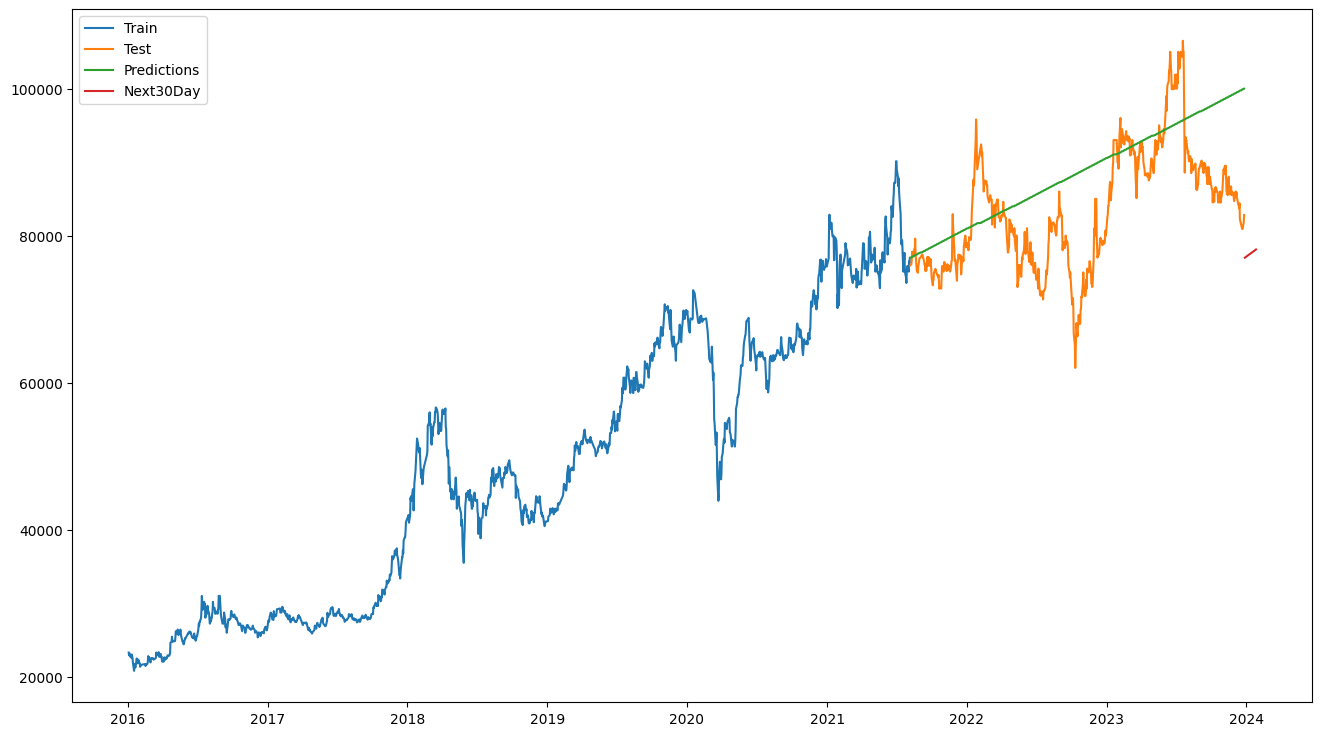

In [54]:
plt.figure(figsize=(16, 9))
plt.plot(train_data73.index, train_data73['Price'])
plt.plot(test_data73.index, test_data73['Price'])
plt.plot(test_data73.index, y_pred73)

# Assuming 'predictions_df' contains the predicted prices for the next 30 days with corresponding dates
plt.plot(predictions_df73.index, predictions_df73['Predicted_Close'])

plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.show()


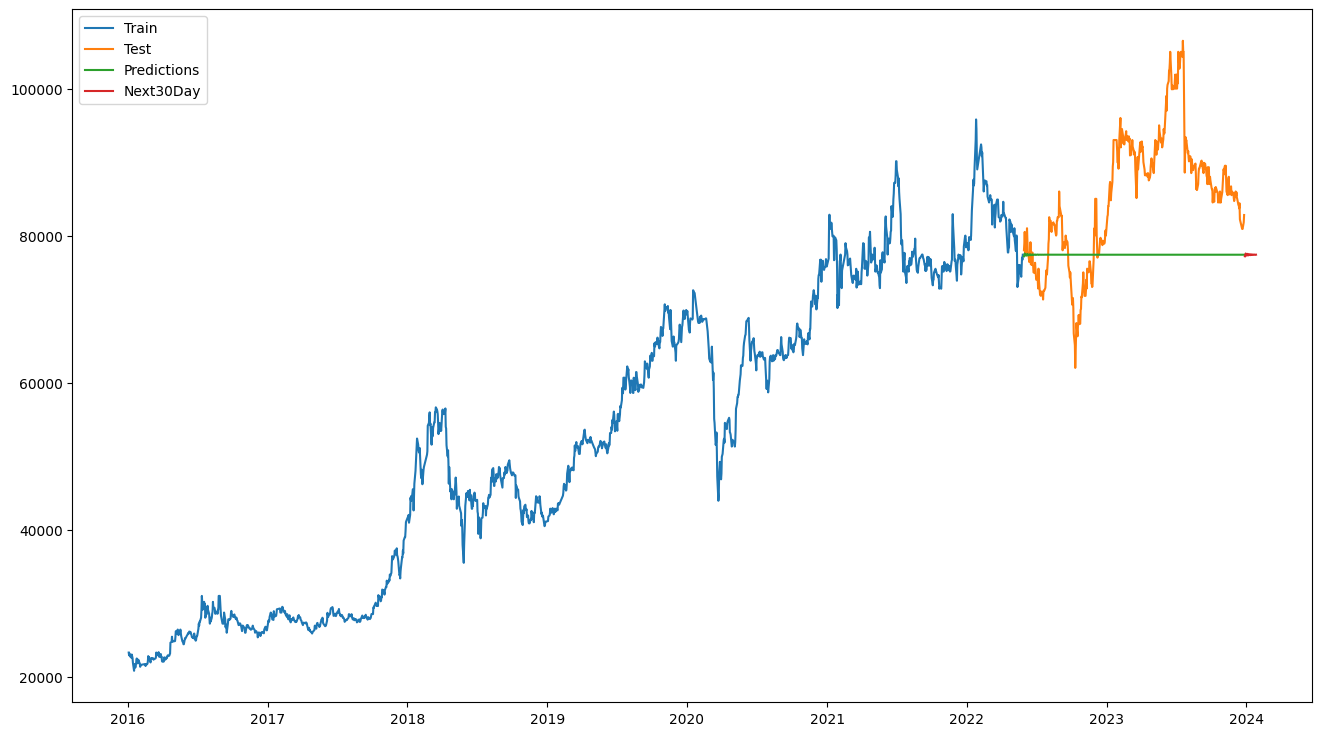

In [55]:
plt.figure(figsize=(16, 9))
plt.plot(train_data82.index, train_data82['Price'])
plt.plot(test_data82.index, test_data82['Price'])
plt.plot(test_data82.index, y_pred82)

# Assuming 'predictions_df' contains the predicted prices for the next 30 days with corresponding dates
plt.plot(predictions_df82.index, predictions_df82['Predicted_Close'])

plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.show()


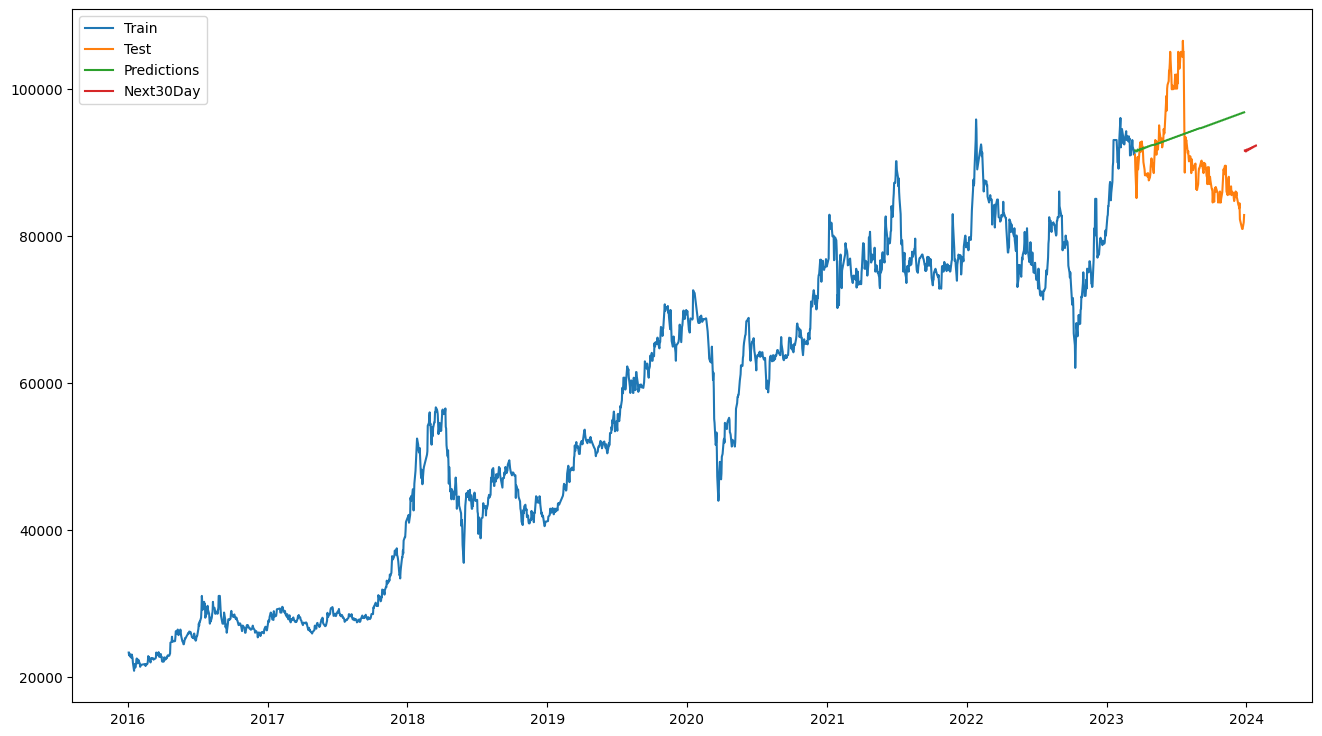

In [56]:
plt.figure(figsize=(16, 9))
plt.plot(train_data91.index, train_data91['Price'])
plt.plot(test_data91.index, test_data91['Price'])
plt.plot(test_data91.index, y_pred91)

# Assuming 'predictions_df' contains the predicted prices for the next 30 days with corresponding dates
plt.plot(predictions_df91.index, predictions_df91['Predicted_Close'])

plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.show()
